In [2]:
import matplotlib.pyplot as plt

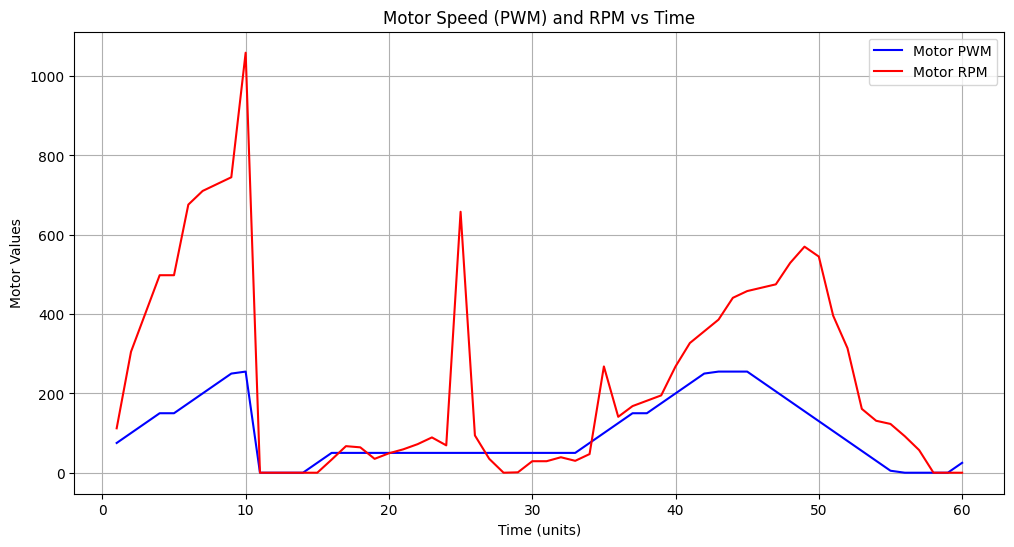

In [3]:
# Complete data for Motor Speed (PWM) and RPM with respect to time
# Assuming time is 1 unit between consecutive data points
time = list(range(1, 61))  # Total of 60 time units

# Corresponding PWM and RPM values extracted from the provided text
motor_pwm = [
    75, 100, 125, 150, 150, 175, 200, 225, 250, 255, 0, 0, 0, 0, 25, 50, 50, 50, 50, 50, 
    50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 75, 100, 125, 150, 150, 175, 200, 
    225, 250, 255, 255, 255, 230, 205, 180, 155, 130, 105, 80, 55, 30, 5, 0, 0, 0, 0, 25
]
motor_rpm = [
    112.0, None, None, 498.0, 498.0, 676.0, None, None, 745.0, 1059.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 33.0, 67.0, 64.0, 35.0, 49.0, 59.0, 72.0, 89.0, 69.0, 658.0, 94.0, 35.0, 0.0, 
    1.0, 29.0, 29.0, 39.0, 30.0, 47.0, 268.0, 141.0, None, None, 195.0, 268.0, None, None, 
    386.0, 441.0, None, None, 475.0, 529.0, 570.0, 545.0, 396.0, 314.0, 161.0, 131.0, 123.0, 
    92.0, 57.0, 0.0, 0.0, 0.0, 
]

# Replace "None" values in RPM data with linear interpolation for smooth plotting
for i in range(len(motor_rpm)):
    if motor_rpm[i] is None:
        prev = next((motor_rpm[j] for j in range(i - 1, -1, -1) if motor_rpm[j] is not None), 0)
        nxt = next((motor_rpm[j] for j in range(i + 1, len(motor_rpm)) if motor_rpm[j] is not None), 0)
        motor_rpm[i] = (prev + nxt) / 2

# Plot the data
plt.figure(figsize=(12, 6))

# Motor PWM vs Time
plt.plot(time, motor_pwm, color='blue', label='Motor PWM')

# Motor RPM vs Time
plt.plot(time, motor_rpm, color='red', label='Motor RPM')

# Graph details
plt.title("Motor Speed (PWM) and RPM vs Time")
plt.xlabel("Time (units)")
plt.ylabel("Motor Values")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [4]:
err = []
for i in range(len(motor_rpm)):
    err.append(motor_rpm[i]-motor_pwm[i])


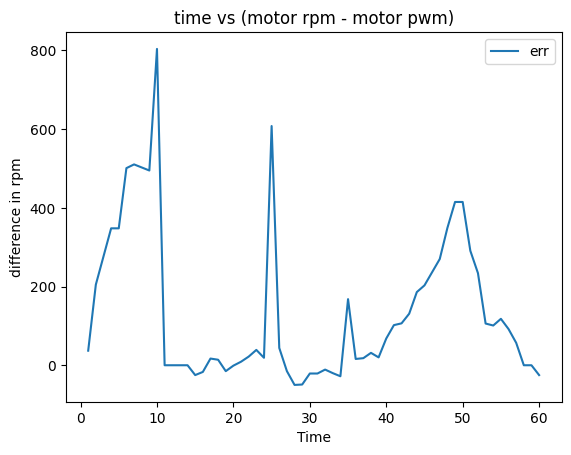

In [5]:
plt.plot(time, err, label = "err")
plt.xlabel("Time")
plt.ylabel("difference in rpm")
plt.title("time vs (motor rpm - motor pwm)")
plt.legend()
plt.show()

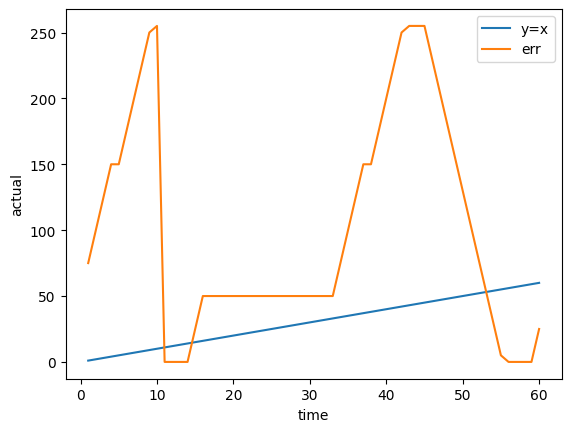

In [6]:
plt.plot(time, time, label = "y=x")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(time, motor_pwm, label  = "err")
plt.xlabel("time")
plt.ylabel("actual")
plt.legend()
plt.show()

In [7]:
motor_rpm

[112.0,
 305.0,
 401.5,
 498.0,
 498.0,
 676.0,
 710.5,
 727.75,
 745.0,
 1059.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 33.0,
 67.0,
 64.0,
 35.0,
 49.0,
 59.0,
 72.0,
 89.0,
 69.0,
 658.0,
 94.0,
 35.0,
 0.0,
 1.0,
 29.0,
 29.0,
 39.0,
 30.0,
 47.0,
 268.0,
 141.0,
 168.0,
 181.5,
 195.0,
 268.0,
 327.0,
 356.5,
 386.0,
 441.0,
 458.0,
 466.5,
 475.0,
 529.0,
 570.0,
 545.0,
 396.0,
 314.0,
 161.0,
 131.0,
 123.0,
 92.0,
 57.0,
 0.0,
 0.0,
 0.0]

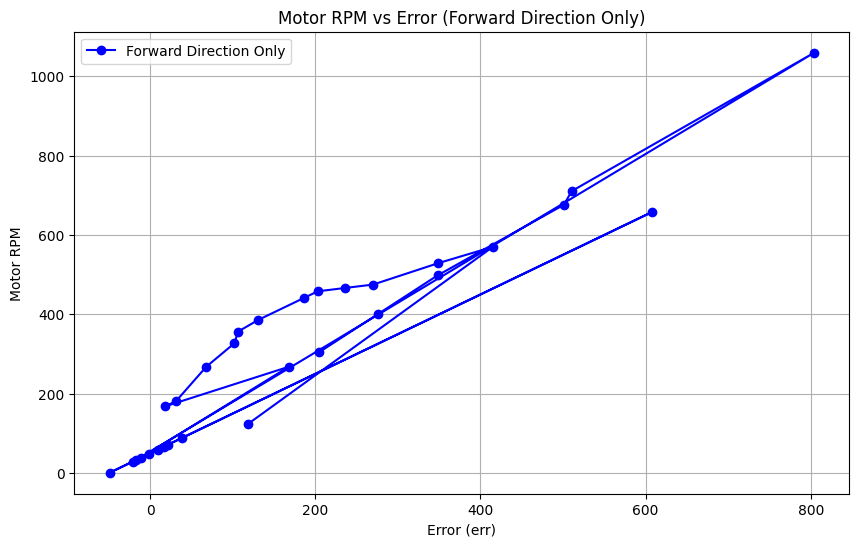

In [8]:


# Extract only forward direction data (remove tracking back points)
forward_err = []
forward_rpm = []

for i in range(1, len(err)):
    if err[i] > err[i - 1]:  # Only keep increasing (forward direction) points
        forward_err.append(err[i])
        forward_rpm.append(motor_rpm[i])

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(forward_err, forward_rpm, label="Forward Direction Only", color="blue", marker="o")
plt.xlabel("Error (err)")
plt.ylabel("Motor RPM")
plt.title("Motor RPM vs Error (Forward Direction Only)")
plt.legend()
plt.grid(True)
plt.show()

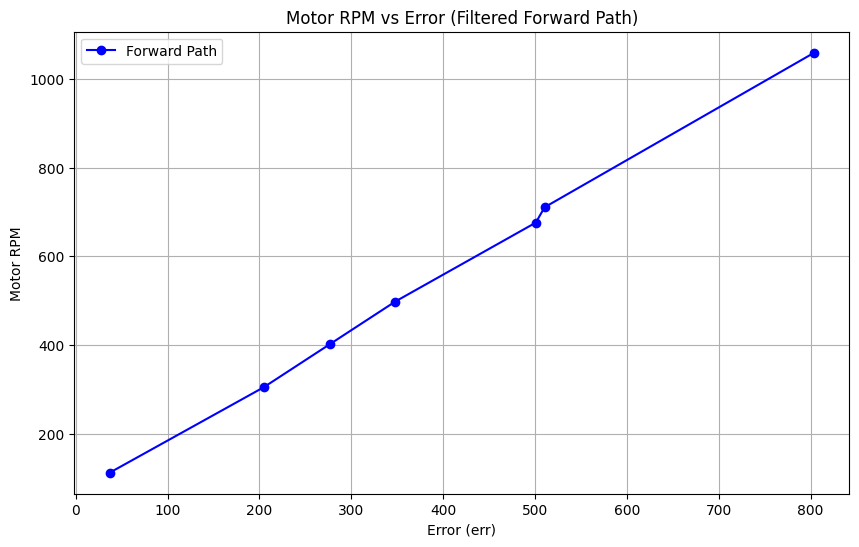

In [14]:
import matplotlib.pyplot as plt

# Provided data
err = [
    37.0, 205.0, 276.5, 348.0, 348.0, 501.0, 510.5, 502.75, 495.0, 804.0, 0.0, 0.0, 0.0, 0.0,
    -25.0, -17.0, 17.0, 14.0, -15.0, -1.0, 9.0, 22.0, 39.0, 19.0, 608.0, 44.0, -15.0, -50.0,
    -49.0, -21.0, -21.0, -11.0, -20.0, -28.0, 168.0, 16.0, 18.0, 31.5, 20.0, 68.0, 102.0,
    106.5, 131.0, 186.0, 203.0, 236.5, 270.0, 349.0, 415.0, 415.0, 291.0, 234.0, 106.0,
    101.0, 118.0, 92.0, 57.0, 0.0, 0.0, -25.0
]
motor_rpm = [
    112.0, 305.0, 401.5, 498.0, 498.0, 676.0, 710.5, 727.75, 745.0, 1059.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 33.0, 67.0, 64.0, 35.0, 49.0, 59.0, 72.0, 89.0, 69.0, 658.0, 94.0, 35.0, 0.0,
    1.0, 29.0, 29.0, 39.0, 30.0, 47.0, 268.0, 141.0, 168.0, 181.5, 195.0, 268.0, 327.0,
    356.5, 386.0, 441.0, 458.0, 466.5, 475.0, 529.0, 570.0, 545.0, 396.0, 314.0, 161.0,
    131.0, 123.0, 92.0, 57.0, 0.0, 0.0, 0.0
]

# Filter data for forward progression only
filtered_err = [err[0]]
filtered_rpm = [motor_rpm[0]]

for i in range(1, len(err)):
    if err[i] > filtered_err[-1]:  # Check forward progression
        filtered_err.append(err[i])
        filtered_rpm.append(motor_rpm[i])

# Plot the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_err, filtered_rpm, label="Forward Path", color="blue", marker="o")
plt.xlabel("Error (err)")
plt.ylabel("Motor RPM")
plt.title("Motor RPM vs Error (Filtered Forward Path)")
plt.legend()
plt.grid(True)
plt.show()